In [1]:
test = "Raw Operational Data from Enterprise Application - KAGGLE.zip (Unzipped Files)/2014/2014-CW-1/lphost07_wls1_unix-process_prod-appserver_2014.12.31_00.00.00.csv"

In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(test)

# Now, you can describe the numeric columns
description = df.describe().transpose()

print(description)


                     count       mean       std   min   25%   50%   75%    max
\Process(java)\MEM  1419.0   9.013249  0.097684   8.8   8.9   9.0   9.1    9.2
\Process(java)\S    1419.0  83.000000  0.000000  83.0  83.0  83.0  83.0   83.0
\Process(java)\CPU  1419.0   1.993658  8.014397   0.0   0.0   0.0   2.0  159.0
\Process(java)\PR   1419.0  20.000000  0.000000  20.0  20.0  20.0  20.0   20.0
\Process(java)\NI   1419.0   0.000000  0.000000   0.0   0.0   0.0   0.0    0.0
Unnamed: 12            0.0        NaN       NaN   NaN   NaN   NaN   NaN    NaN


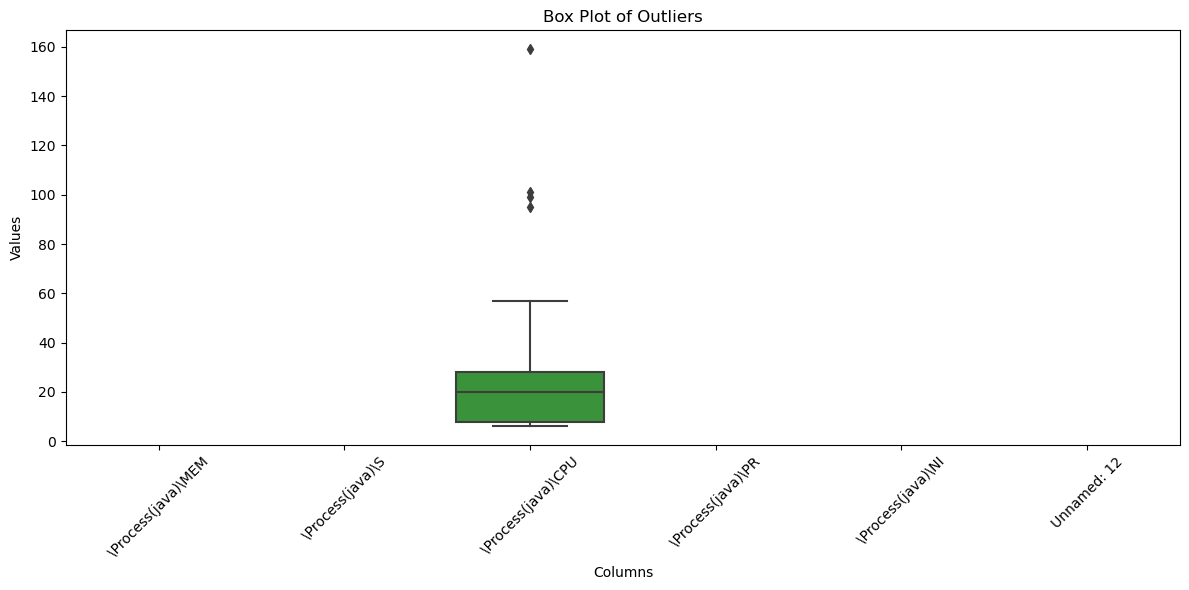

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define a function to identify outliers based on IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Find outliers for each numeric column
numeric_columns = df.select_dtypes(include=['number']).columns
outliers = df[numeric_columns].apply(find_outliers_iqr)

# Plot outliers using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns][outliers])
plt.xticks(rotation=45)
plt.title('Box Plot of Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


/tmp/ipykernel_9145/2730710456.py:6: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  if pd.to_datetime(df.iloc[0, 0], errors='coerce') is not pd.NaT:


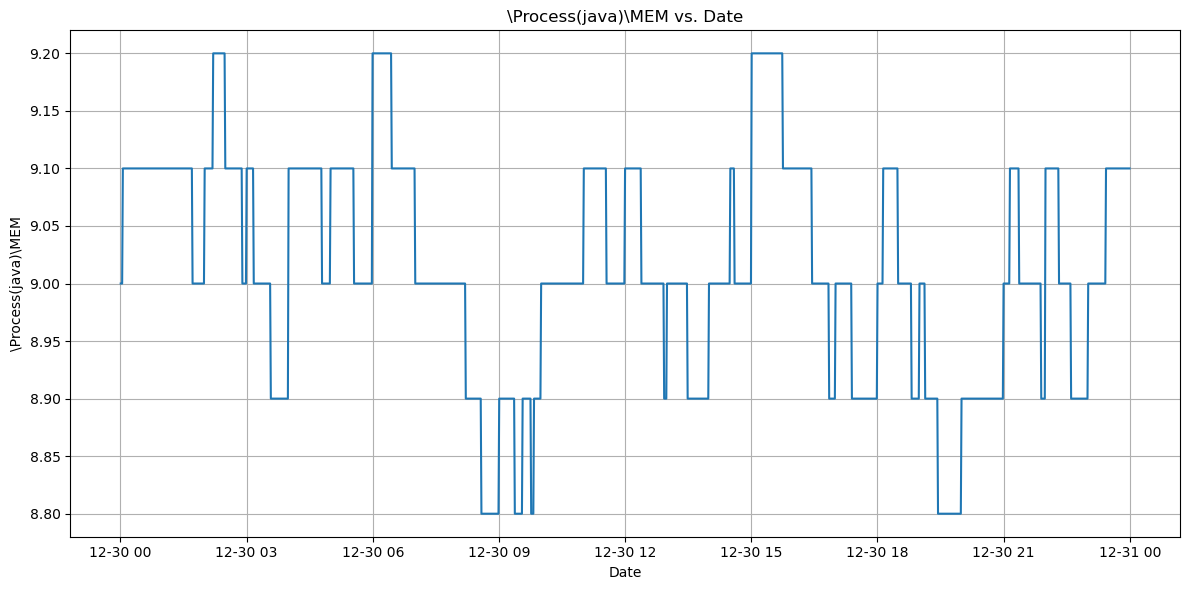

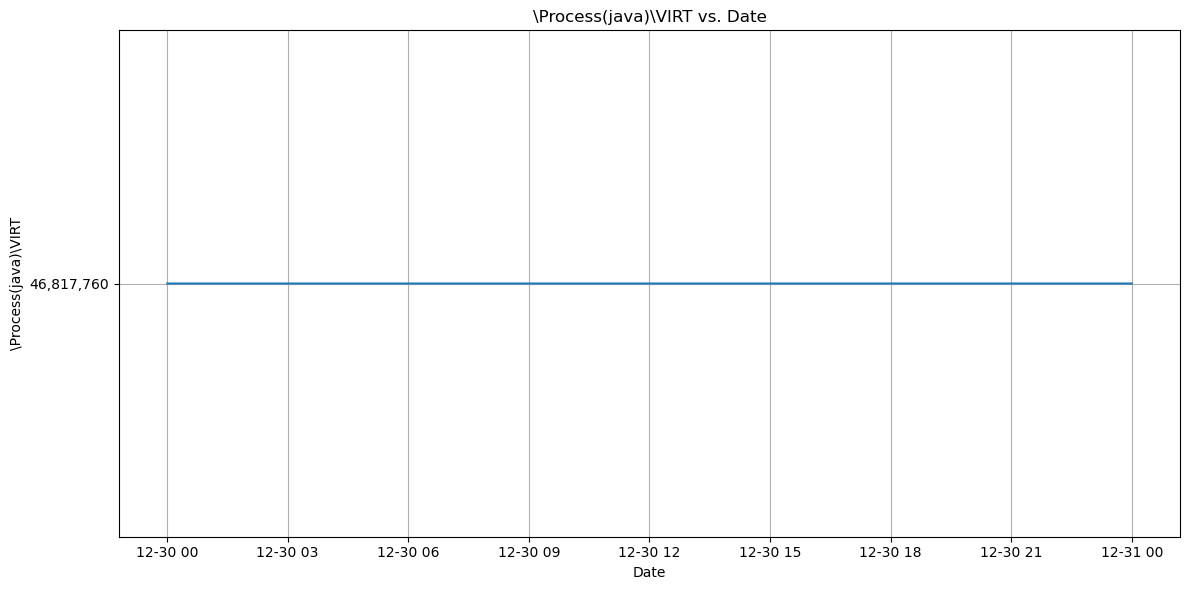

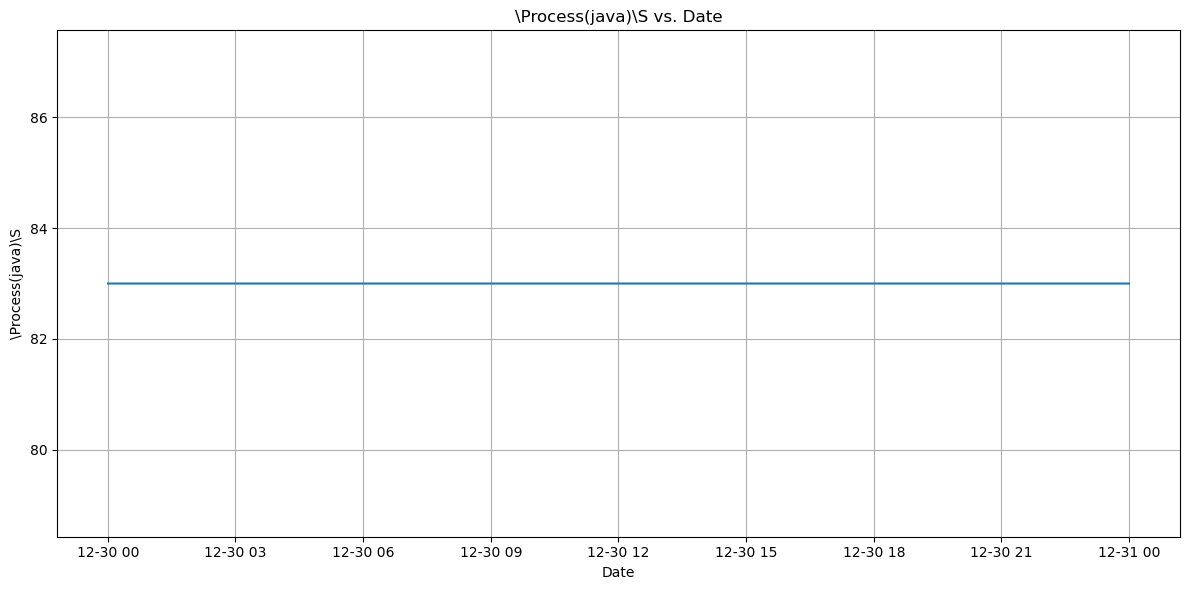

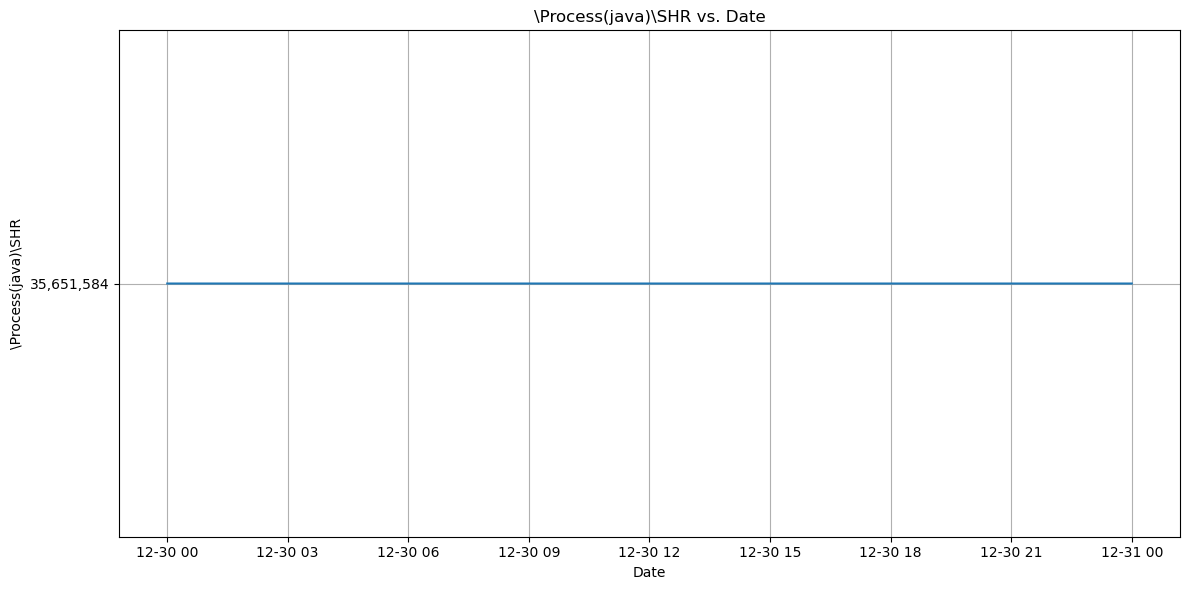

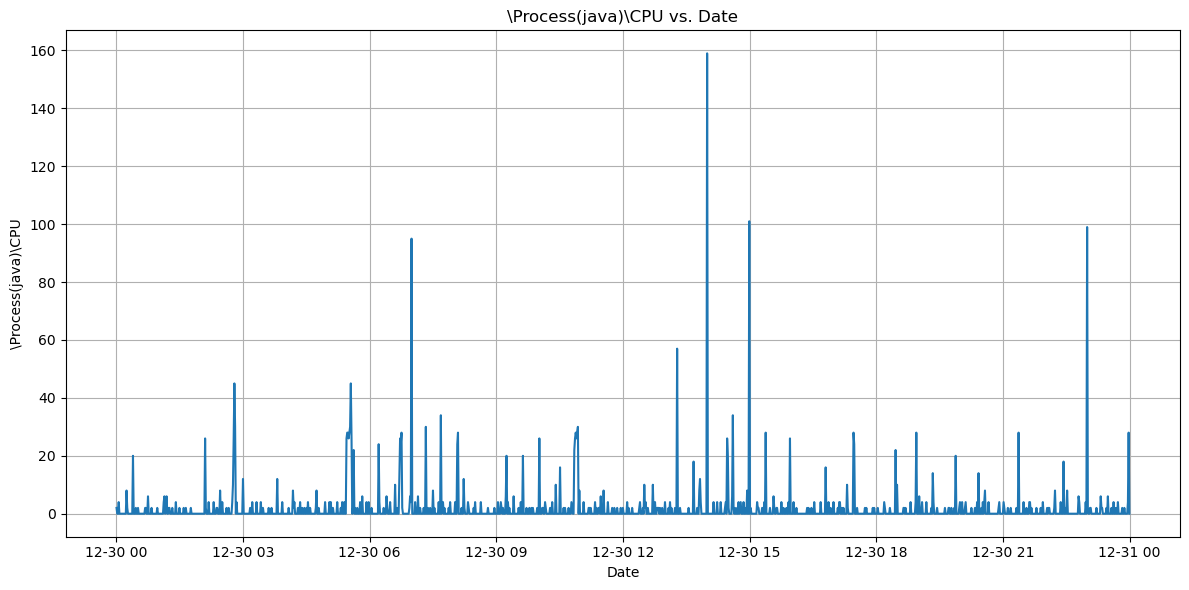

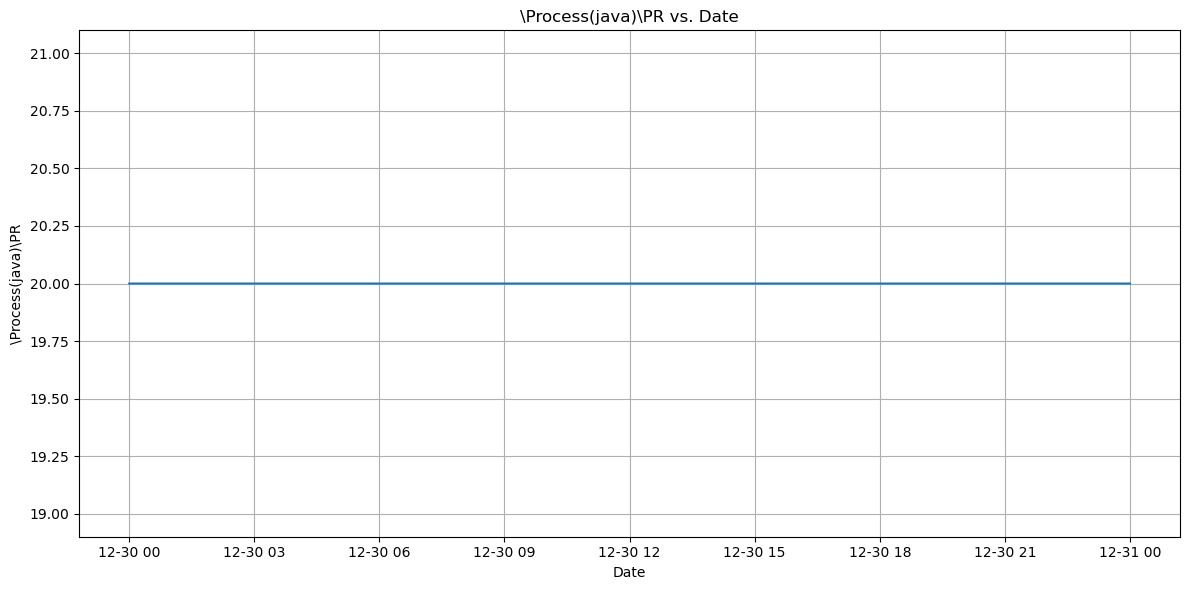

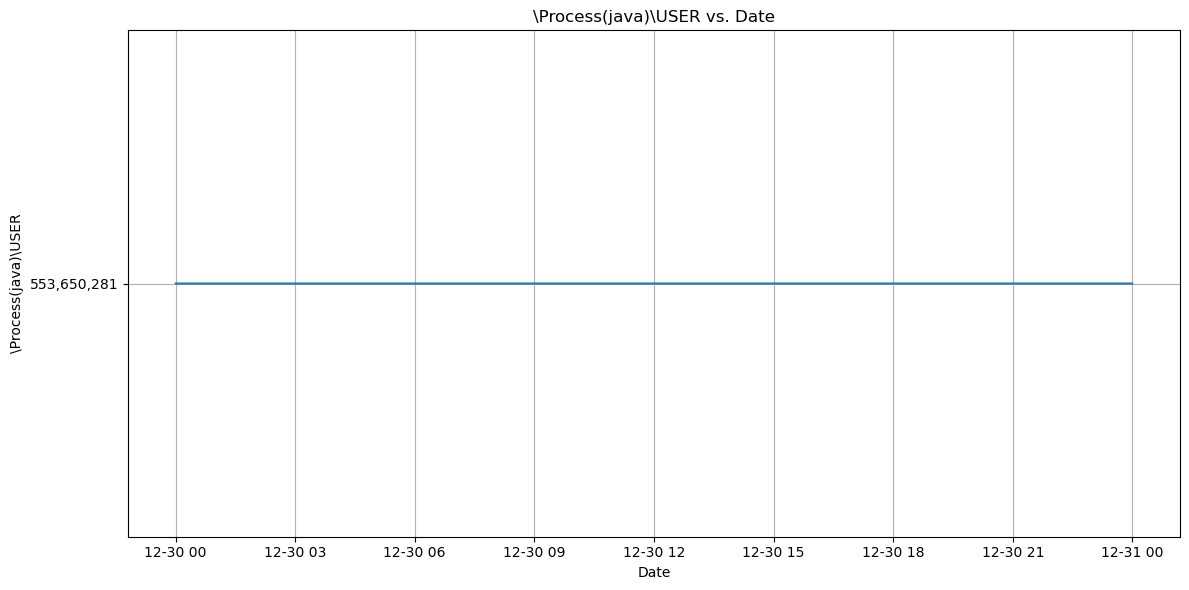

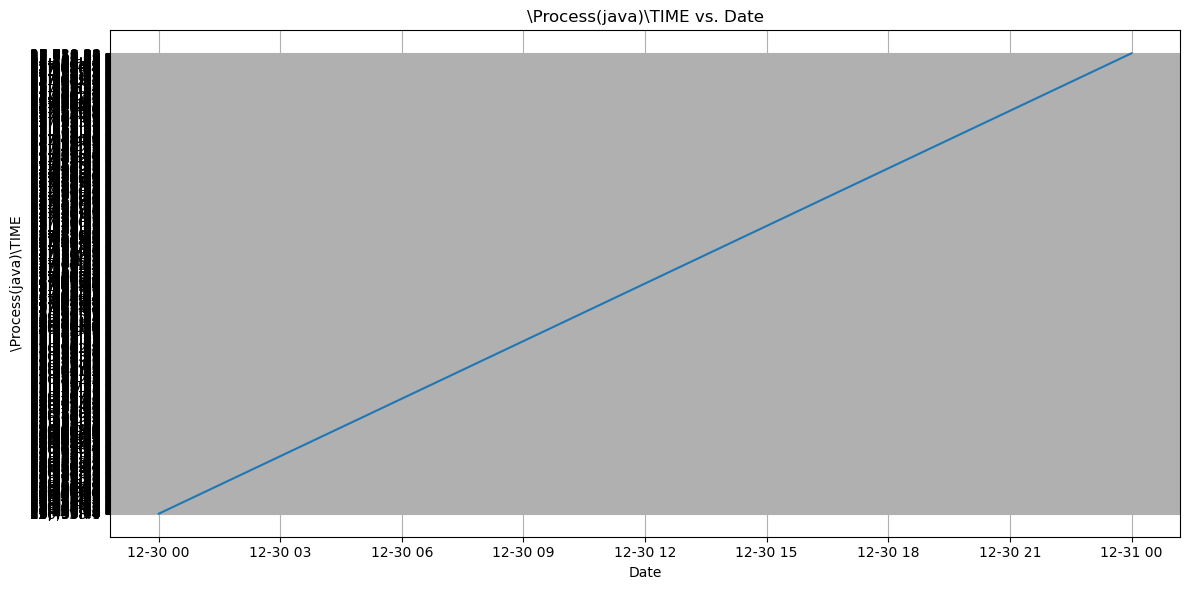

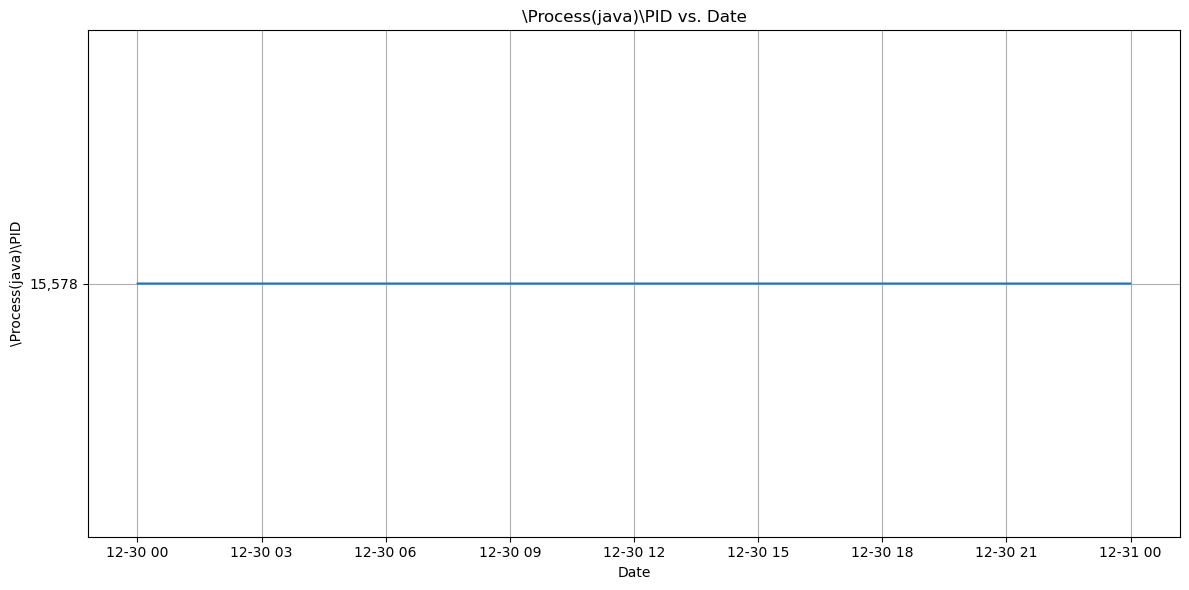

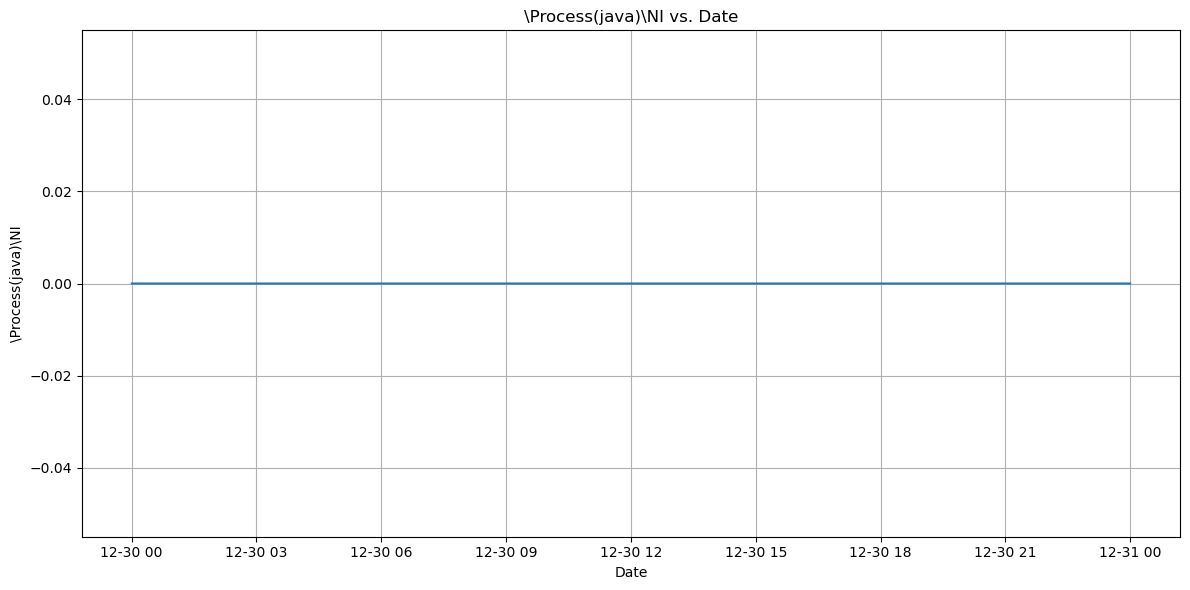

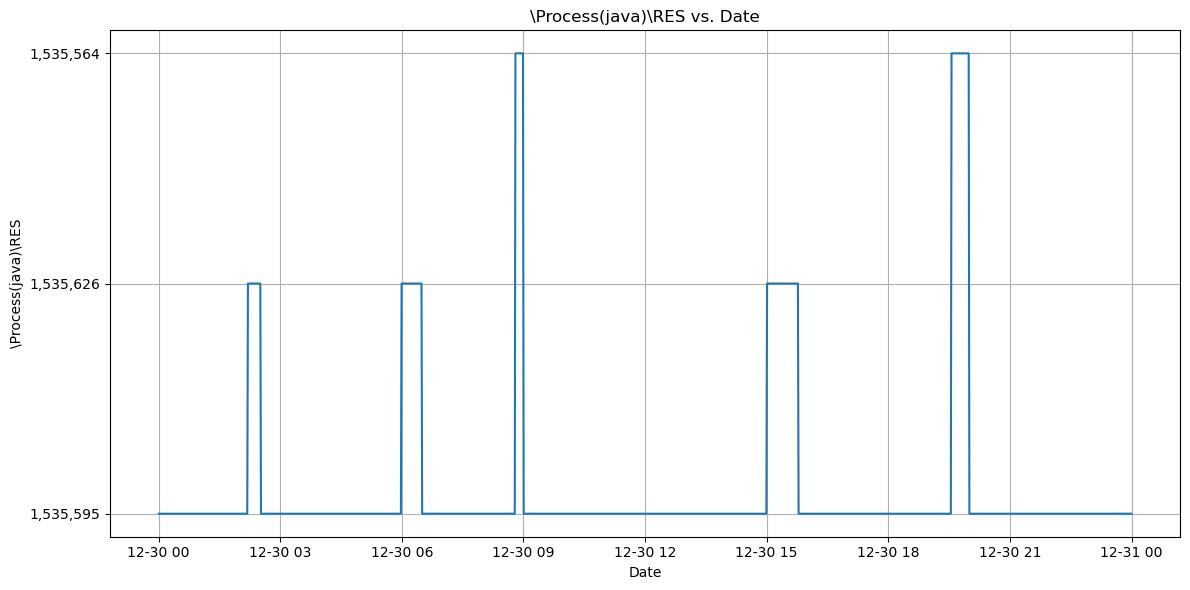

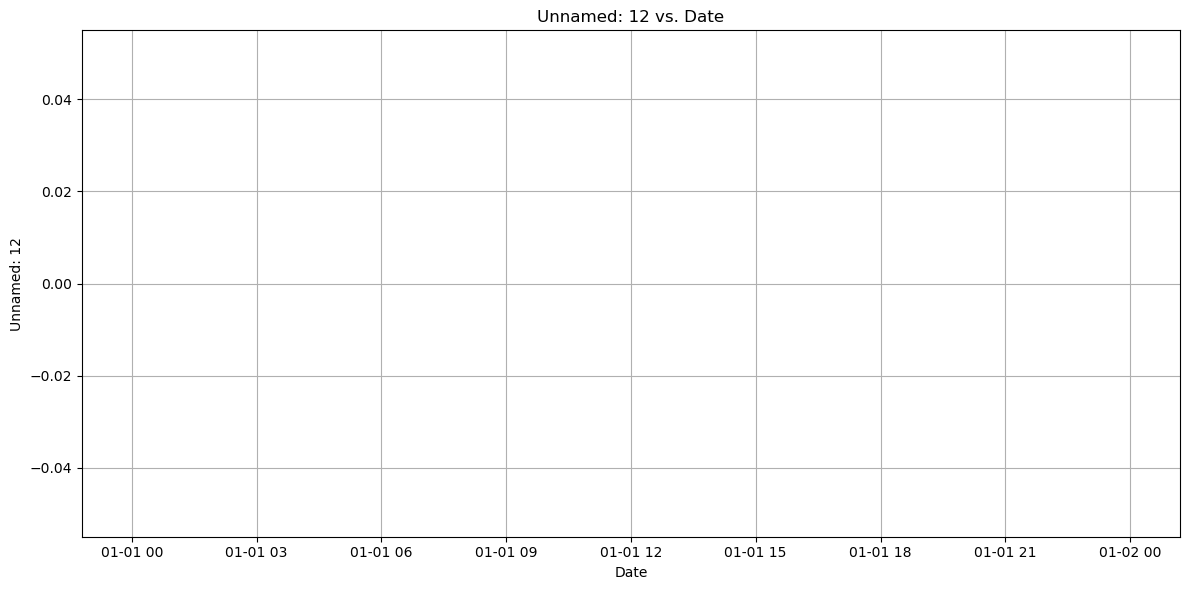

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Check if the first column is a date and convert it to datetime
if pd.to_datetime(df.iloc[0, 0], errors='coerce') is not pd.NaT:
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M:%S.%f', errors='coerce')

    # Plot the variation of all other columns with respect to the datetime column
    for column in df.columns[1:]:
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df[column])
        plt.title(f'{column} vs. Date')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("The first column is not in a valid date format.")
